Basically a sandbox. Sometimes used to test if Salish is being funny or if my code is just very very slow. 

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from salishsea_tools import (nc_tools, viz_tools, gsw_calls)
import numpy.ma as ma
from matplotlib import animation, rc
%matplotlib inline

In [8]:
rc('animation', html='html5')

In [9]:
mesh_mask = nc.Dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')
new_domain = mesh_mask.variables['tmask'][0,:,334:898,114:398]   
def calc_rho(Sal, TempC, P):
    sqrSal = np.sqrt(Sal)
    R1 = ((((6.536332e-9 * TempC - 1.120083e-6) * TempC + 1.001685e-4)
           * TempC - 9.095290e-3) * TempC + 6.793952e-2) * TempC - 28.263737
    R2 = (((5.3875e-9 * TempC - 8.2467e-7) * TempC + 7.6438e-5)
          * TempC - 4.0899e-3) * TempC + 8.24493e-1
    R3 = (-1.6546e-6 * TempC + 1.0227e-4) * TempC - 5.72466e-3
    SIG = (4.8314e-4 * Sal + R3 * sqrSal + R2) * Sal + R1
    V350P = 1.0 / 1028.1063
    SVA   = -SIG * V350P / (1028.1063 + SIG)
    rho = 28.106331 - SVA / (V350P * (V350P + SVA)) + 1000
    return rho

In [4]:
C0 =nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/C0/SalishSea_1h_20170101_20170107_grid_T.nc')
C02 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/C0.2/SalishSea_1h_20170101_20170107_grid_T.nc')
D0 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/D0/SalishSea_1h_20170101_20170107_grid_T.nc')
D02 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/D0.2/SalishSea_1h_20170101_20170107_grid_T.nc')

In [5]:
depthb = C0.variables['deptht'][:]
saline1b = C0.variables['vosaline'][:]
temp1b = C0.variables['votemper'][:]
saline2b = D0.variables['vosaline'][:]
temp2b = D0.variables['votemper'][:]
saline3b = C02.variables['vosaline'][:]
temp3b = C02.variables['votemper'][:]
saline4b = D02.variables['vosaline'][:]
temp4b = D02.variables['votemper'][:]

In [7]:
rho = 1023.3
a = np.expand_dims(depthb, 1).T
b = np.expand_dims(np.expand_dims(a,2), 3)

In [8]:
c = np.ones((155,40,564, 284)) * b

MemoryError: 

In [ ]:
density1b = calc_rho(saline1b, temp1b, c)
density2b = calc_rho(saline2b, temp2b, c)
density3b = calc_rho(saline3b, temp3b, c)
density4b = calc_rho(saline4b, temp4b, c)

In [ ]:
index1b = (np.abs(density1b - rho)).argmin(axis=1)
index2b = (np.abs(density2b - rho)).argmin(axis=1)
index3b = (np.abs(density3b - rho)).argmin(axis=1)
index4b = (np.abs(density4b - rho)).argmin(axis=1)

In [6]:
list_of_depths1b = np.zeros((155,564,284))
for t in range(155):
    for y in range(564):
        for x in range(284):
            list_of_depths1b[t,y,x] = depthb[index1b[t,y,x]]
list_of_depths2b = np.zeros((155,564,284))
for t in range(155):
    for y in range(564):
        for x in range(284):
            list_of_depths2b[t,y,x] = depthb[index2b[t,y,x]]
list_of_depths3b = np.zeros((155,564,284))
for t in range(155):
    for y in range(564):
        for x in range(284):
            list_of_depths3b[t,y,x] = depthb[index3b[t,y,x]]
list_of_depths4b = np.zeros((155,564,284))
for t in range(155):
    for y in range(564):
        for x in range(284):
            list_of_depths4b[t,y,x] = depthb[index4b[t,y,x]]
mask_land = 1 - new_domain[0,:,:]

MemoryError: 

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(15,15))
def animate30(i):
    ax[0,0].clear()
    ax[0,1].clear()
    ax[1,0].clear()
    ax[1,1].clear()
    masked_depths1b = ma.masked_array(list_of_depths1b[i,:,:], mask = mask_land)
    masked_depths2b = ma.masked_array(list_of_depths2b[i,:,:], mask = mask_land)
    masked_depths3b = ma.masked_array(list_of_depths3b[i,:,:], mask = mask_land)
    masked_depths4b = ma.masked_array(list_of_depths4b[i,:,:], mask = mask_land)
    ax[0,0].contourf(masked_depths1b, levels = np.linspace(0, 58, 8))
    ax[0,1].contourf(masked_depths2b, levels = np.linspace(0, 58, 8))
    ax[1,0].contourf(masked_depths3b, levels = np.linspace(0, 58, 8))
    ax[1,1].contourf(masked_depths4b, levels = np.linspace(0, 58, 8))
    ax[0,0].set_title('hour = %03d'%(i)) 
    ax[0,1].set_title('hour = %03d'%(i)) 
    ax[1,0].set_title('hour = %03d'%(i)) 
    ax[1,1].set_title('hour = %03d'%(i))
    return ax

interval = 0.25#in seconds
ani40 = animation.FuncAnimation(fig,animate30,frames=155,interval=interval*1e+3, repeat=False)
ani40

In [3]:
Jan04 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/LakeJan0.4/SalishSea_1h_20170101_20170107_grid_T.nc')

In [49]:
def animatedensity(file, yslice, xlims, ylims, mesh_mask):
    pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file.variables['nav_lat'][yslice,:][:],1)).T])
    fig = plt.figure(figsize=(8,8))
    ax1 = fig.add_subplot(121)
    deptht = file.variables['deptht'][:]
    yslicemask = 1 - mesh_mask[:,yslice,:]
    def animate30(i):
        ax1.clear()
        density1 = calc_rho(file.variables['vosaline'][i,:,yslice,:],
                                        file.variables['votemper'][i,:,yslice,:],
                                        pressure1)
        masked_density1 = ma.masked_array(density1, mask = yslicemask)
        den = ax1.contourf(np.arange(0,284), deptht, masked_density1, 
                      levels = np.linspace(1021.5, 1024.5, 11) #, colors='black'
            )
        ax1.set_ylim(ylims)
        ax1.set_xlim(xlims)
        ax1.set_title('Y = ' + str(yslice) + ', hour = %03d'%(i)) 
        fig.colorbar(den, ax=ax1)
    interval = 0.25#in seconds
    ani40 = animation.FuncAnimation(fig,animate30,frames=5,interval=interval*1e+3, repeat=False)
    return ani40

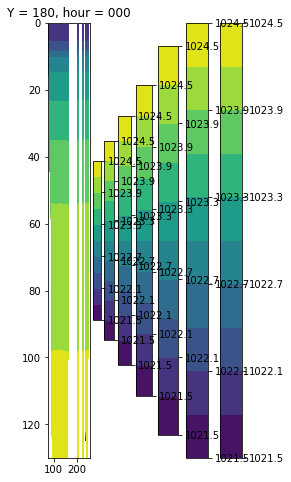

In [50]:
animatedensity(Jan04, 180, (75,258), (130,0), new_domain)

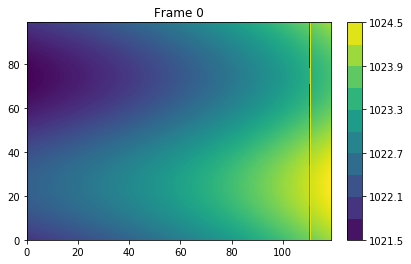

In [46]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure()
ax = fig.add_subplot(111)

# I like to position my colorbars this way, but you don't have to
div = make_axes_locatable(ax)
cax = div.append_axes('right', '5%', '5%')

def f(x, y):
    return np.exp(x) + np.sin(y)

x = np.linspace(0, 1, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

frames = []
for i in range(10):
    x       += 1
    curVals  = f(x, y)
    frames.append(curVals)

cv0 = frames[0]
cf = ax.contourf(cv0, 200)
cb = fig.colorbar(cf, cax=cax)
tx = ax.set_title('Frame 0')

def animate(i):
    arr = frames[i]
    vmax     = np.max(arr)
    vmin     = np.min(arr)
    levels   = np.linspace(vmin, vmax, 200, endpoint = True)
    cf = ax.contourf(arr,levels=np.linspace(1021.5, 1024.5, 11))
    cax.cla()
    fig.colorbar(cf, cax=cax)
    tx.set_text('Frame {0}'.format(i))

ani = animation.FuncAnimation(fig, animate, frames=10)

ani

In [1]:
import netCDF4 as nc
import numpy as np
import xarray as xr
from salishsea_tools import nc_tools, viz_tools, grid_tools, geo_tools
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.signal as signal
from matplotlib import animation, rc
%matplotlib inline

rc('animation', html='html5')

nemo_ji = np.array([(400, 25), (350,35), (300,40), (240,120), (250,50), (200,120), (150,150), 
                    (100,170), (50,180)]) + (335,115)
def calc_rho(Sal, TempC, P):
    sqrSal = np.sqrt(Sal)
    R1 = ((((6.536332e-9 * TempC - 1.120083e-6) * TempC + 1.001685e-4)
           * TempC - 9.095290e-3) * TempC + 6.793952e-2) * TempC - 28.263737
    R2 = (((5.3875e-9 * TempC - 8.2467e-7) * TempC + 7.6438e-5)
          * TempC - 4.0899e-3) * TempC + 8.24493e-1
    R3 = (-1.6546e-6 * TempC + 1.0227e-4) * TempC - 5.72466e-3
    SIG = (4.8314e-4 * Sal + R3 * sqrSal + R2) * Sal + R1
    V350P = 1.0 / 1028.1063
    SVA   = -SIG * V350P / (1028.1063 + SIG)
    rho = 28.106331 - SVA / (V350P * (V350P + SVA)) + 1000
    return rho

In [2]:
grid = xr.open_dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
atmos_grid = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaAtmosphereGridV1')
winds_data = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1')
hindcast = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSn3DTracerFields1hV16-10')
mesh_mask = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')

In [3]:
def animate_nowcast(time_slice2, rho):
    x_slice = slice(115, 365)
    y_slice = slice(335, 785)
    sal2 = (hindcast.salinity
        .isel( gridX=x_slice, gridY=y_slice)
        .sel(time=time_slice2))
    temp2 = (hindcast.temperature
         .isel(gridX = x_slice, gridY = y_slice)
         .sel(time=time_slice2))
    sal_values2 = sal2.values
    temp_values2 = temp2.values
    depth = hindcast.depth.values
    density1 = calc_rho(sal_values2, temp_values2, depth[np.newaxis,:,np.newaxis, np.newaxis])
    index1 = (np.abs(density1 - rho)).argmin(axis=1)
    time, zshape, yshape, xshape = sal_values2.shape
    list_of_depths1 = np.zeros((time,450,250))
    for t in range(time):
        for y in range(450):
            for x in range(250):
                list_of_depths1[t,y,x] = depth[index1[t,y,x]]
    N = 1
    Wn = 1/24
    B, A = signal.butter(N,Wn)
    vwinds2 = np.zeros((9,time+1))
    i=0
    for point in nemo_ji:
        nemo_lon = grid.nav_lon.isel(y=point[0], x=point[1])
        nemo_lat = grid.nav_lat.isel(y=point[0], x=point[1])
        nemo_lon_lat = (np.asscalar(nemo_lon.values), np.asscalar(nemo_lat))
        atmos_ji = geo_tools.find_closest_model_point(
            nemo_lon_lat[0], nemo_lon_lat[1],
            atmos_grid.longitude.values - 360, atmos_grid.latitude.values,
            grid = "GEM2.5")
        u_wind_ts = (winds_data.u_wind
                 .isel(gridY=atmos_ji[0], gridX=atmos_ji[1])
                 .sel(time=time_slice2))
        v_wind_ts = (winds_data.v_wind
                 .isel(gridY=atmos_ji[0], gridX=atmos_ji[1])
                 .sel(time=time_slice2))
        rotated_u_winds, rotated_v_winds = viz_tools.rotate_vel(u_wind_ts.values, 
                                                       v_wind_ts.values, origin = 'map' )
        windfu = signal.filtfilt(B,A, rotated_u_winds)
        windfv = signal.filtfilt(B,A,rotated_v_winds)
        vwinds2[i]=windfv
        i = i + 1
    mask_land = 1 - mesh_mask.variables['tmask'][0,0,335:785,115:365]
    fig,ax = plt.subplots(2,1,figsize=(8,8))
    colours = cm.jet(np.linspace(0,1,9))
    def animate30(i):
        ax[0].clear()
        ax[1].clear()
        for p, colour in zip(range(9), colours):
            ax[0].plot(range(time+1), vwinds2[p], color = colour)
        ax[0].plot((i, i), (-5,15), 'b--', color = 'black')
        ax[0].set_ylim(-5,15)
        ax[0].grid('on')
        masked_depths1 = np.ma.masked_array(list_of_depths1[i,:,:], mask = mask_land)
        ax[1].contourf(masked_depths1, 
                      levels = np.linspace(0, 80, 8))
        ax[1].set_title('hour = %03d'%(i)) 
        return ax

    interval = 0.25#in seconds
    ani40 = animation.FuncAnimation(fig,animate30,frames=time,interval=interval*1e+3, repeat=False)
    return ani40

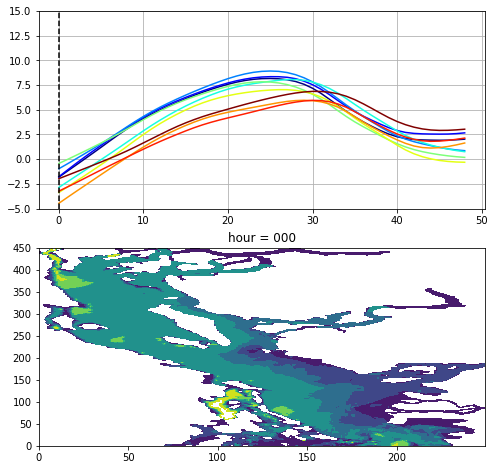

In [5]:
animate_nowcast(slice('2016-12-01 12:00:00', '2016-12-03 12:00:00'), 1023.3)

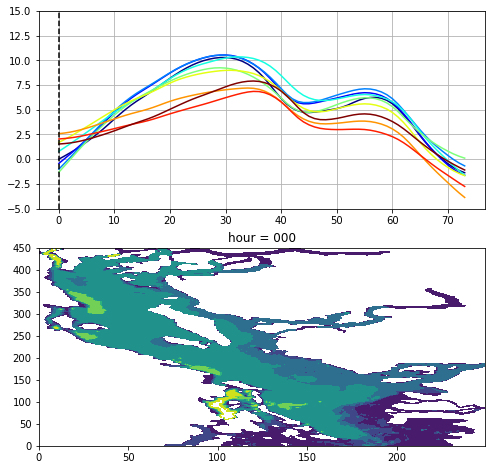

In [6]:
animate_nowcast(slice('2016-12-17 22:00:00', '2016-12-20 23:00:00'), 1023.3)

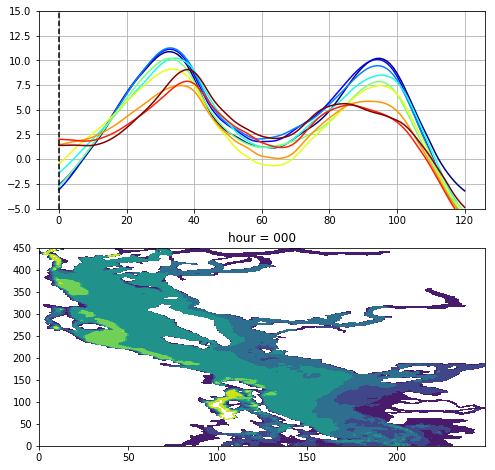

In [7]:
animate_nowcast(slice('2016-12-25 12:00:00', '2016-12-30 12:00:00'), 1023.3)

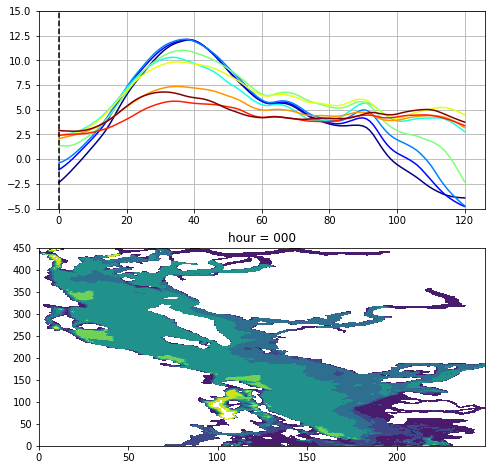

In [8]:
animate_nowcast(slice('2017-01-05 12:00:00', '2017-01-10 12:00:00'), 1023.3)

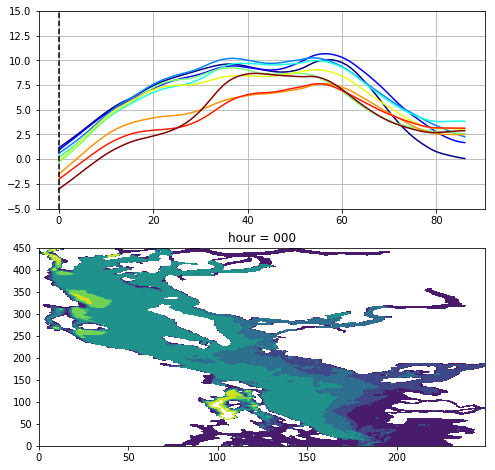

In [9]:
animate_nowcast(slice('2017-02-13 22:00:00', '2017-02-17 12:00:00'), 1023.3)

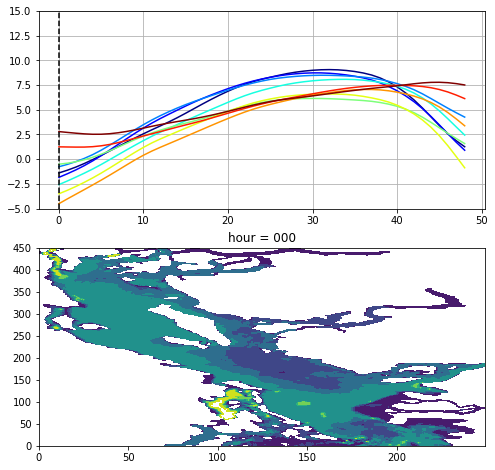

In [10]:
animate_nowcast(slice('2017-03-01 12:00:00', '2017-03-03 12:00:00'), 1023.3)

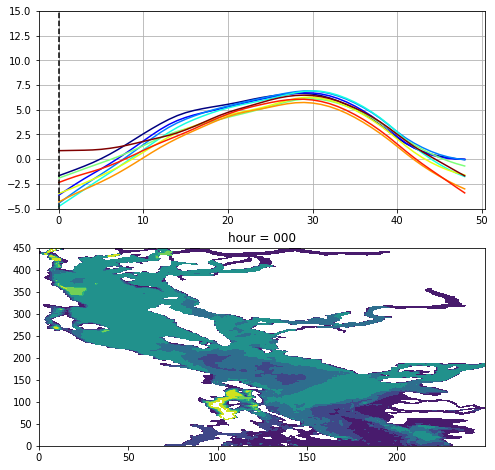

In [11]:
animate_nowcast(slice('2017-03-06 12:00:00', '2017-03-08 12:00:00'), 1023.3)

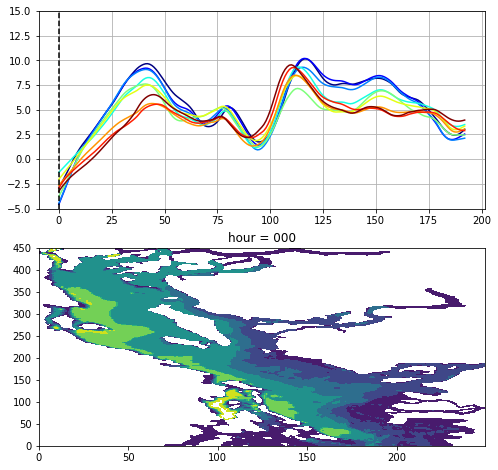

In [13]:
animate_nowcast(slice('2017-04-03 12:00:00', '2017-04-11 12:00:00'), 1023.3)

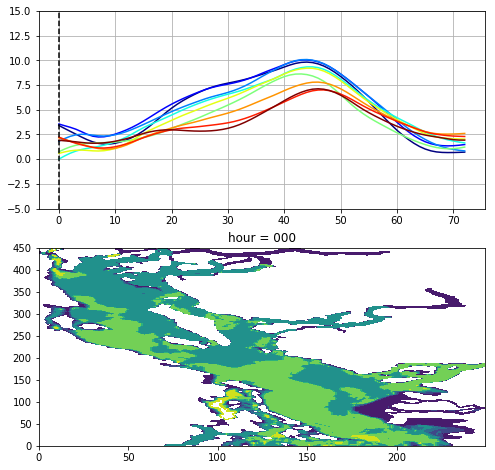

In [12]:
animate_nowcast(slice('2017-06-13 23:00:00', '2017-06-16 23:00:00'), 1023.3)

In [2]:
bathy = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')

In [3]:
from salishsea_tools import tidetools, geo_tools

In [4]:
Bathy, x, y= tidetools.get_bathy_data(bathy)

In [5]:
x[:5]

array([[-123.42943573, -123.42411804, -123.41880035, ..., -121.32898712,
        -121.32366943, -121.31835175],
       [-123.43196869, -123.42677307, -123.42152405, ..., -121.33235931,
        -121.32704163, -121.32172394],
       [-123.43463898, -123.42948151, -123.42427063, ..., -121.33573151,
        -121.33041382, -121.32509613],
       [-123.43738556, -123.43223572, -123.42704773, ..., -121.3391037 ,
        -121.33378601, -121.32846832],
       [-123.44017029, -123.43502808, -123.42985535, ..., -121.34247589,
        -121.3371582 , -121.33184052]])

In [6]:
geo_tools.find_closest_model_point(-123.203056, 49.795000, x, y, land_mask = Bathy.mask)

(533, 391)

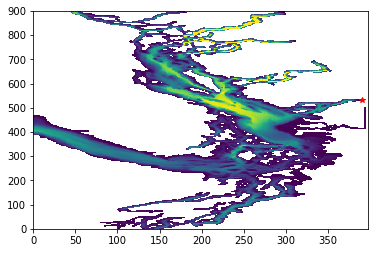

In [7]:
plt.pcolormesh(Bathy[:])
plt.plot(391, 533, 'r*')

In [8]:
mesh_mask = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')

In [9]:
mesh_mask.variables['tmask'][0,0,533,391]

1

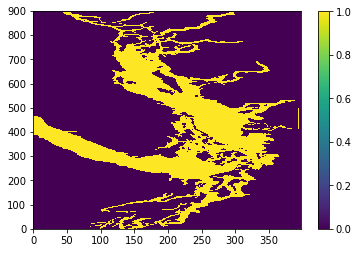

In [12]:
plt.pcolormesh(mesh_mask.variables['tmask'][0,0,...])
plt.colorbar()

In [13]:
mesh_mask.variables['tmask'][0,:,533,391]

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)